# Validation and Metrics Evaluation

Para avaliar se um modelo de machine learning tem boa capacidade de generalização, ou seja, se ele performa bem em dados novos e não vistos, usamos diversas técnicas de validação e ferramentas disponíveis no Scikit-learn. A abordagem padrão envolve dividir os dados em conjuntos de treino e teste, treinar o modelo nos dados de treino e avaliar sua performance nos dados de teste. Além disso, Scikit-learn oferece várias funções de métrica e métodos de validação cruzada para uma avaliação mais robusta.

### *Validação Cruzada*

A validação cruzada é uma técnica poderosa para avaliar a capacidade de generalização de um modelo. cross_val_score realiza várias iterações de treinamento e avaliação em diferentes subconjuntos dos dados, proporcionando uma avaliação mais robusta e confiável.

### *Funções de Métrica*

Scikit-learn fornece várias funções de métrica para avaliar diferentes aspectos da performance do modelo, como precisão, recall, F1-score, erro absoluto médio (MAE), entre outros.

### *Considerações Adicionais*

- Validação Cruzada Estratificada: Para problemas de classificação com classes desbalanceadas, a validação cruzada estratificada (StratifiedKFold) pode ser usada para garantir que cada fold tenha a mesma proporção de classes.

- Scoring Customizado: Você pode definir suas próprias métricas de avaliação e usá-las com cross_val_score ou outras funções de validação cruzada setando o hiperparâmetro ***scoring***

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Regression Metrics

### Para avaliar modelos de regressão, costuma-se usar três métricas principais:

### 1 Erro Médio Absoluto (Mean Absolute Error - MAE):

  - Descrição: O MAE é robusto a outliers e mede a média das diferenças absolutas entre as previsões e os valores reais.

  - Fórmula:

$$
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |\hat{y}_i - y_i|
$$

onde:
- \( $n$ \) é o número total de observações,
- \( $\hat{y}_i$ \) é o valor previsto,
- \( $y_i$ \) é o valor real.

### 2 Raiz do Erro Quadrático Médio (Root Mean Squared Error - RMSE):

  - Descrição: O RMSE é mais sensível a outliers e mede a raiz quadrada da média dos erros quadráticos. É útil quando queremos penalizar erros maiores de forma mais severa.

  - Fórmula: 

$$
\text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (\hat{y}_i - y_i)^2}
$$

onde:
- \( $n$ \) é o número total de observações,
- \( $\hat{y}_i$ \) é o valor previsto,
- \( $y_i$ \) é o valor real.

### 3 Coeficiente de Determinação ($R^2$)

  - Descrição: O $R^2$ mede a proporção da variância dos dados que é explicada pelo modelo. Se 1, indica que o modelo explica perfeitamente a variabilidade dos dados, enquanto um coef de 0 indica que o modelo não explica nenhuma variabilidade.

  - Fórmula: 

$$
R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
$$

onde:
- \( $n$ \) é o número total de observações,
- \( $y_i$ \) é o valor real,
- \( $\hat{y}_i$ \) é o valor previsto,
- \( $\bar{y}$ \) é a média dos valores reais.


### 4 Cross_Val_Score

Por padrão, se nenhum parâmetro scoring for especificado, o cross_val_score usa o coeficiente de determinação ($R^2$) como métrica de avaliação para regressões.

Porém é possível determinar qual métrica usar no hiperparêmtro setando scoring como:

  - ‘neg_mean_absolute_error’ para calcular MAE

  - ‘neg_mean_squared_error’ para calcular o MSE 

  Obs: MSE precisam ser transformados para positivos visto que o cross_val_score traz a função de máxima utilidade, e então se aplicado o np.sqrt() para o RMSE

In [1]:
from sklearn.metrics import mean_absolute_error #MAE
y_true = [3, 0.5, 2.5, 9]
y_pred = [2.5, 0.0, 2, 9]
mean_absolute_error(y_true, y_pred)

0.375

In [3]:
from sklearn.metrics import mean_squared_error
import numpy as np
y_true = [[0.5, 1],[-1, 1],[7, -6]]
y_pred = [[0, 2],[-1, 2],[8, -5]]
print(f'MSE : {mean_squared_error(y_true, y_pred)}')

print(f'RMSE: {np.sqrt(mean_squared_error(y_true, y_pred))}')

MSE : 0.7083333333333334
RMSE: 0.8416254115301732


In [4]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
diabetes = datasets.load_diabetes()
X = diabetes.data[:150]
y = diabetes.target[:150]
lin_reg = linear_model.LinearRegression()
print(cross_val_score(lin_reg, X, y, cv=3))

[0.49842308 0.10377707 0.44394205]


In [5]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
diabetes = datasets.load_diabetes()
X = diabetes.data[:150]
y = diabetes.target[:150]
lin_reg = linear_model.LinearRegression()
mse = cross_val_score(lin_reg, X, y, cv=3, scoring='neg_mean_squared_error')
rmse = np.sqrt(-mse)
print(rmse)
print(f'Median: {rmse.mean()}')
print(f'Desvio: {rmse.std()}')

[52.22797785 59.00707618 59.36881186]
Median: 56.86795529496516
Desvio: 3.2842813737212992


# Classification Metrics

Para classificação as métricas usadas são Accuracy, Precision, Recall e F1 score e ROC/AUC.


### Accuracy

Accuracy seria mais bem utilizada caso seu target fosse balanceada nos dados de treino. Quando a variável alvo (target) é assimétrica, isso significa que uma classe pode estar muito mais presente do que a outra. Nesse cenário, simplesmente calcular a acurácia (accuracy) pode ser enganoso, pois um modelo que prevê apenas a classe majoritária pode ter uma alta acurácia simplesmente por acertar a classe mais frequente

$$
\text{Accuracy} = \frac{\text{Número de predições corretas}}{\text{Número total de amostras}}
$$

onde:
- Número de predições corretas é o número de previsões corretas feitas pelo modelo,
- Número total de amostras é o número total de amostras no conjunto de dados.

Nesses casos, seria mais aplicável a Matriz de Confusão e os demais cálculos

### A matriz de confusão traz 4 entradas TN[0:0] -> Verdadeiros Negativos, FP[0:1] -> Falsos Positivos, FN[1:0]-> Falsos Negativos, TP[1:1] -> Verdadeiros Positivos

TN -> Valores negativos previstos corretamente
FP -> Valores Previstos como Positivos mas eram para ser Negativos
FN -> Valores previstos como Negativos mas eram para ser Positivos
TP -> Valores positivos previstos corretamente

Disso temos uma boa ideia de como nosso algoritmo funciona

Dessa matriz podemos também definir a Precisão e a Revocação (Recall)

### Precisão:

A precisão mede a proporção de exemplos previstos como positivos que são realmente positivos.



$$
\text{Precisão} = \frac{TP}{TP + FP}
$$

onde:
- \( $TP$ \) é o número de verdadeiros positivos,
- \( $FP$ \) é o número de falsos positivos.

É útil quando o foco está em minimizar falsos positivos, ou seja, quando é crucial que as previsões positivas sejam confiáveis.


### Revocação :

O recall mede a proporção de exemplos da classe positiva que foram corretamente identificados pelo modelo.

$$
\text{Recall} = \frac{TP}{TP + FN}
$$

onde:
- \( $TP$ \) é o número de verdadeiros positivos,
- \( $FN$ \) é o número de falsos negativos.

É uma taxa de verdadeiros positivos ou sensibilidade, é a proporção de valores positivos detectadas. É útil quando queremos minimizar os falsos negativos.


### F1 Score:

O F1 score é a média harmônica entre precision e recall, oferecendo uma única métrica que equilibra ambas.

$$
\text{F1 Score} = 2 \cdot \frac{\text{Precisão} \cdot \text{Recall}}{\text{Precisão} + \text{Recall}}
$$

onde:
- Precisão é a precisão do modelo,
- Recall é a sensibilidade do modelo.




#### ***O trade-off ocorre porque, geralmente, aumentar o recall de um modelo (ou seja, fazer com que ele identifique mais exemplos da classe positiva) leva a uma diminuição na precision (mais exemplos falsos positivos são previstos como positivos). Da mesma forma, aumentar a precision tende a diminuir o recall, pois o modelo será mais criterioso ao prever a classe positiva, reduzindo o número de exemplos verdadeiros positivos que ele identifica.***

O objetivo é encontrar um equilíbrio adequado entre recall e precision, dependendo do contexto do problema:

- **Contextos de Alta Precision: São situações onde é crucial minimizar os falsos positivos, mesmo que isso signifique reduzir o recall. Por exemplo, diagnósticos médicos onde é importante não cometer erros ao diagnosticar uma doença.**

- **Contextos de Alto Recall: São situações onde é crucial capturar a maioria dos exemplos da classe positiva, mesmo que isso signifique aceitar mais falsos positivos. Por exemplo, em detecção de fraudes financeiras, é fundamental identificar a maioria das transações fraudulentas, mesmo que algumas transações legítimas sejam erroneamente identificadas como fraudes.**

#### Para isso plotamos a curva PR para encontrar um limiar(threshold) para o modelo

*Toda vez que te perguntarem que precisam de um algoritmo com 90% de precisão, pergunte em quando nível de recall*



### ROC Curve e AUC score

Curva ROC e AUC (Area Under the Curve): A curva ROC mostra a taxa de verdadeiros positivos (recall) em função da taxa de falsos positivos (1 - especificidade), enquanto a AUC representa a habilidade do modelo em distinguir entre classes. É útil para entender como o modelo se comporta em diferentes limiares de decisão.

Quando mais distante a curva ROC estiver da constante, melhor classificador fica o mais distante da curva.
AUC score seria um cálculo da área da ROC curve, quanto mais próxima de 1, melhor é o modelo



### OBS:

***Se é mais importante os falsos positivos que os falsos negativos, opte pela curva PR (precision, recall), caso contrário, a curva ROC é a melhor opção, isso porque, quando queremos minimizar falsos positivos, queremos diminuir o recall com a melhor precisão possível e quando queremos diminuir falsos negativos, queremos o melhor limiar que diminuia os FP com a melhor revocação e quando as classes forem mais balanceadas***

## Classificador Binário

Definição: Na classificação binária, o objetivo é prever a qual de duas classes um ponto de dados pertence. Geralmente, as classes são rotuladas como positiva (1) e negativa (0), ou como classe 1 e classe 0. Ou True e False ou Falso e Positivo

In [6]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

X, y = mnist["data"], mnist["target"]
X.shape

some_digit = X[0]

y = y.astype(np.uint8)

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier()

sgd_clf.fit(X_train, y_train_5)

sgd_clf.predict([some_digit])

c:\Users\Luis Henrique\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


array([ True])

In [7]:
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.96395, 0.9445 , 0.95925])

In [8]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix


y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
confusion_matrix(y_train_5, y_train_pred)

array([[53351,  1228],
       [  943,  4478]], dtype=int64)

In [9]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)
recall_score(y_train_5, y_train_pred)

0.8260468548238332

In [10]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.8048890087175339

In [11]:
from sklearn.metrics import precision_recall_curve

y_scores = cross_val_predict(sgd_clf,X_train,y_train_5, cv=3, method='decision_function' )


precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

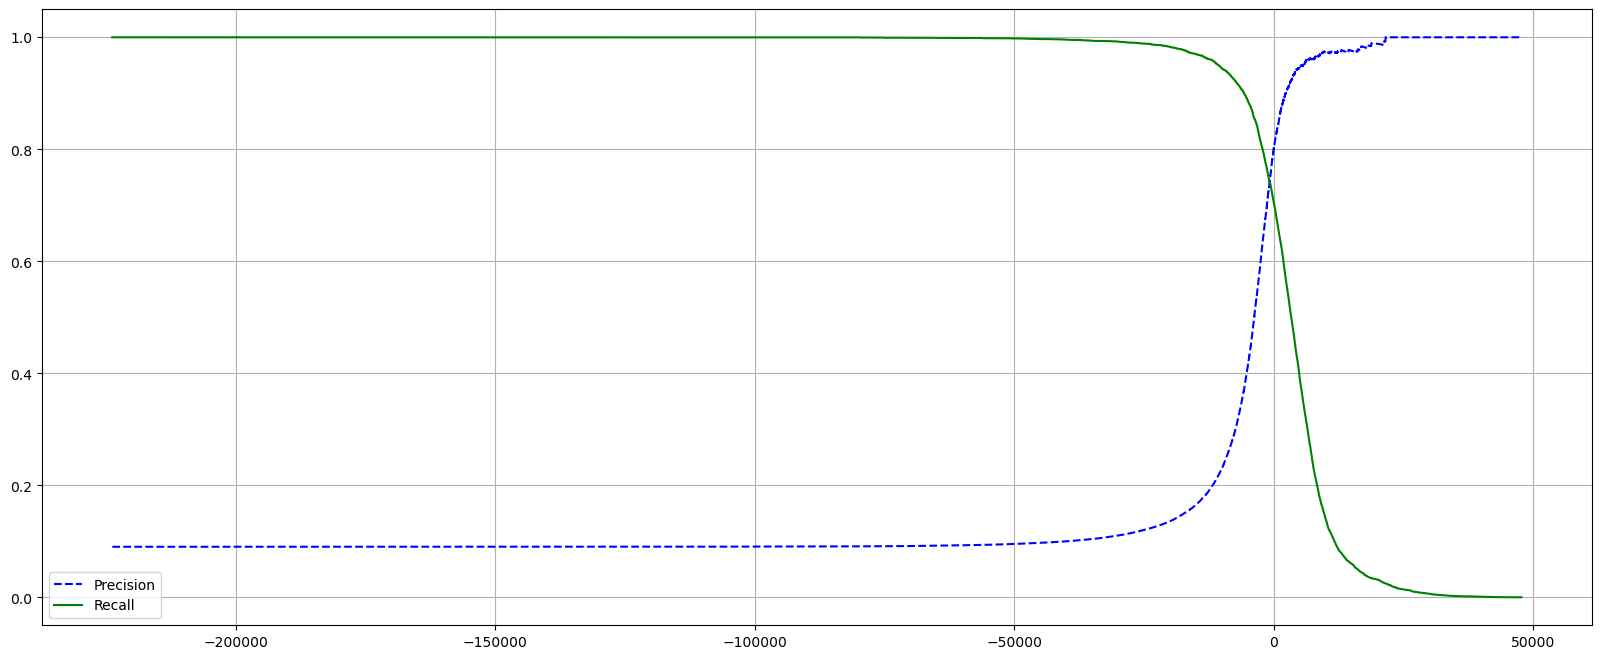

In [12]:
import matplotlib.pyplot as plt

def plot_precision_recall(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
    plt.plot(thresholds, recalls[:-1],'g-',label='Recall')
    [...]

plt.figure(figsize=(20,8))
plot_precision_recall(precisions, recalls, thresholds)
plt.legend()
plt.grid()
plt.show()

In [13]:
#Precisão começa a diminuir consideravelmente com 80% de recall. Caso queria uma precisão de 90% deve decidir algo por volta de -10000 de limiar

decision_scores = sgd_clf.decision_function(X_test)

threshold = 10000

y_pred = (decision_scores > threshold)

print("Previsões com limiar {}: {}".format(threshold, y_pred))

Previsões com limiar 10000: [False False False ... False False False]


In [14]:
precision = precision_score(y_test_5, y_pred)
recall = recall_score(y_test_5, y_pred)

print("Precisão com limiar {}: {:.2f}".format(threshold, precision))
print("Recall com limiar {}: {:.2f}".format(threshold, recall))

Precisão com limiar 10000: 0.88
Recall com limiar 10000: 0.01


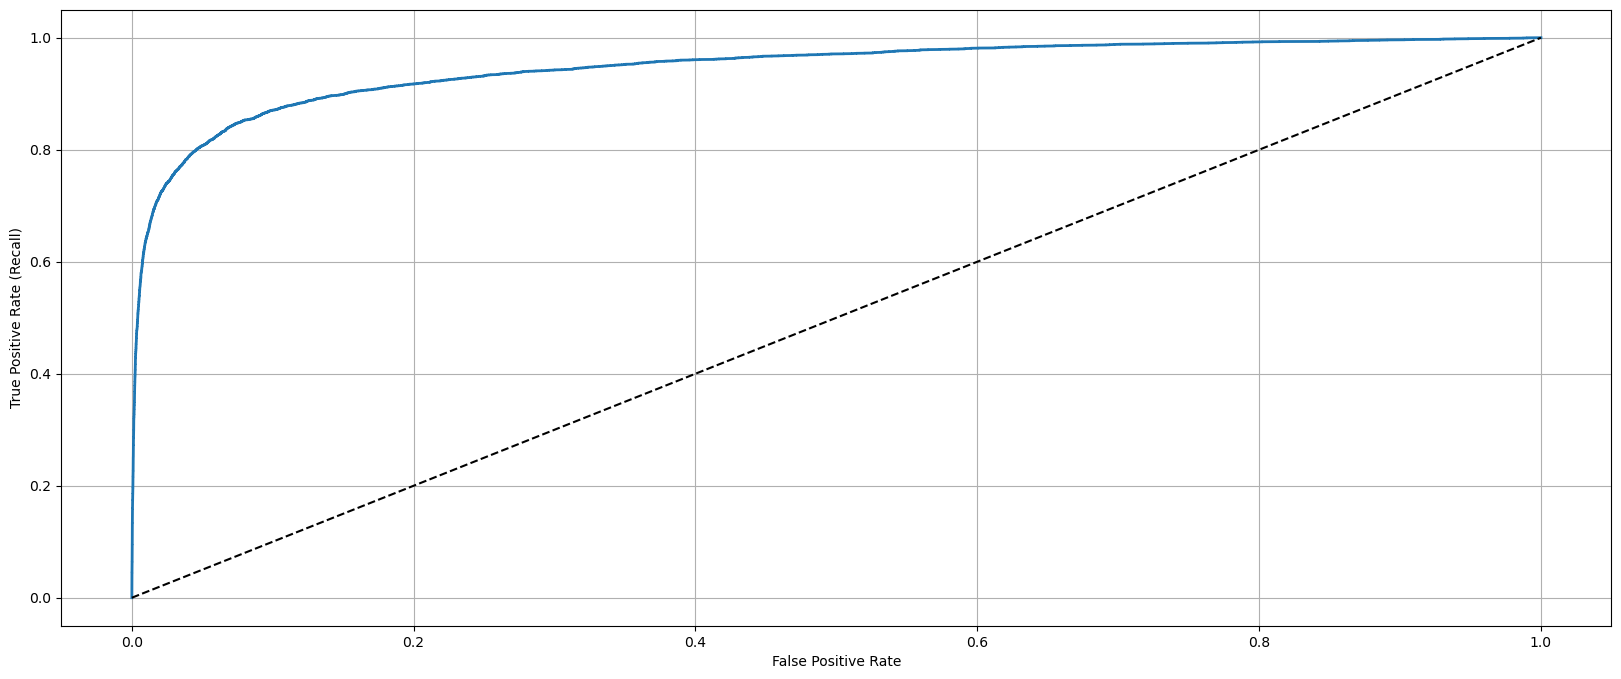

In [15]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(20,8))
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    plt.grid()
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate (Recall)')

plot_roc_curve(fpr,tpr)
plt.show()

In [16]:
from sklearn.metrics import roc_auc_score, auc
roc_auc_score(y_train_5, y_scores)

0.9460719971181937

In [17]:
decision_scores = sgd_clf.decision_function(X_test)


fpr, tpr, thresholds = roc_curve(y_test_5, decision_scores)
roc_auc = auc(fpr, tpr)

recall_desejado = 0.82

idx = np.argmax(tpr >= recall_desejado)
limiar_recall_desejado = thresholds[idx]

print(f"Limiar para recall de {recall_desejado:.2f}: {limiar_recall_desejado:.2f}")

Limiar para recall de 0.82: -1503.37


In [18]:
y_pred_recall = (decision_scores >= limiar_recall_desejado)

precision = precision_score(y_test_5, y_pred_recall)
recall = recall_score(y_test_5, y_pred_recall)

print("Precisão com limiar {}: {:.2f}".format(threshold, precision))
print("Recall com limiar {}: {:.2f}".format(threshold, recall))

##### Uma observação, o y_pred e y_pred_recall retornam valores True e False, sendo True valores positivos e False valores negativos 

Precisão com limiar 10000: 0.75
Recall com limiar 10000: 0.82


## Classificador Multiclasse

Definição: Na classificação multiclasse, o problema envolve prever a qual de três ou mais classes um ponto de dados pertence. Cada classe pode ser identificada por um rótulo exclusivo.

Exemplo: Classificar imagens de dígitos manuscritos de 0 a 9, identificar o tipo de animal em uma imagem (cachorro, gato, pássaro, etc.).

Algoritmos como KNN ou Árvores de Decisão suportam modelagens multiclasses, SVM e SGD são próprios para problemas binários, mas podem ser adaptados para problemas multiclasses com métodos OvO ou OvR


One-vs-One (OvO) é uma estratégia usada para estender classificadores binários a problemas multiclasse. Em OvO, um classificador binário é treinado para cada par de classes
Para um problema com classes de 0 a 9, temos 10 classes no total. Então, o número de classificadores binários necessários seria: 45 (N * (N -1) / 2)

Cada um desses 45 classificadores é treinado para distinguir entre um par específico de classes. Por exemplo, um classificador pode ser treinado para distinguir entre as classes 0 e 1, outro para 0 e 2, e assim por diante.

Durante a predição, cada um desses classificadores faz uma predição, e a classe que recebe o maior número de "votos" é escolhida como a predição final.

Ou seja, quando se faz o predict() para cada instância ele fará a predição pelo melhor classificador OvO, após ter testado todos para a instância e selecionado o com maior voto

obs: O decision_function irá retornar uma lista para cada um dos targets 


In [19]:
sgd_clf.fit(X_train, y_train)

SGDClassifier()

In [20]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring='accuracy')

array([0.868  , 0.85695, 0.8532 ])

In [21]:
sgd_clf.predict(X_test)

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

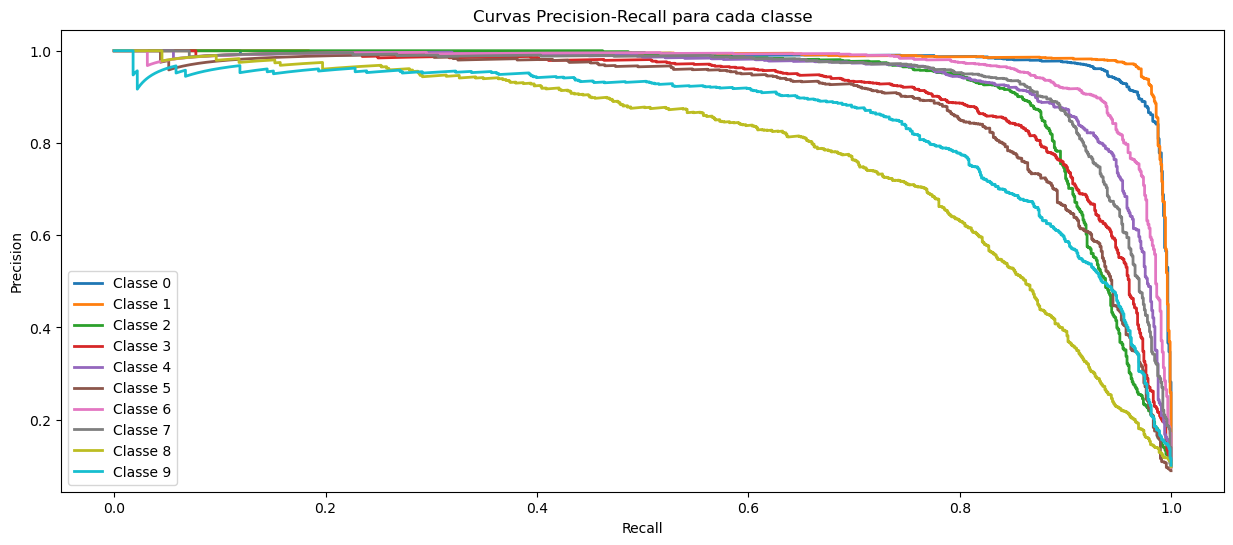

In [22]:
y_scores = sgd_clf.decision_function(X_test)


plt.figure(figsize=(15, 6))

for i in range(10):  # Existem 10 classes (0-9) no conjunto de dados MNIST
    precision, recall, thresholds = precision_recall_curve((y_test == i).astype(int), y_scores[:, i])
    plt.plot(recall, precision, lw=2, label='Classe {}'.format(i))


plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curvas Precision-Recall para cada classe')
plt.legend(loc='best')
plt.show()

Seleção da Classe: Dependendo do seu contexto e do problema de classificação, pode haver uma classe específica para a qual você deseja ajustar o threshold. Por exemplo, se estiver trabalhando com um problema onde a classe positiva é mais crítica (por exemplo, detecção de fraudes), você poderia focar na curva Precision-Recall dessa classe.

Após examinar as curvas Precision-Recall para as classes relevantes, você pode escolher um threshold que otimize a precisão e o recall de acordo com suas necessidades.

In [23]:
# Encontrar o índice onde recall é acima de 40% e precisão é acima de 90% 
idx = np.argmax((recall >= 0.4) & (precision >= 0.9)) # isso irá depender da classe mais importante ou de qual estará analisando
    
selected_threshold = thresholds[idx]

In [24]:
decision_scores = sgd_clf.decision_function(X_test)


# Escolhendo a classe com maior pontuação de decisão
y_pred = np.argmax(decision_scores, axis=1)

# Aplicando um limiar às pontuações de decisão para cada classe
y_pred_thresholded = (decision_scores > selected_threshold)

# Selecionando a classe com score acima do threshold para cada instância
y_pred_with_threshold = np.argmax(y_pred_thresholded, axis=1)

print("Previsões com limiar {}: {}".format(threshold, y_pred_with_threshold))

Previsões com limiar 10000: [7 2 1 ... 4 5 6]


In [25]:
for i in range(10):  # Para 10 classes NO NOSSO CASO
    precision = precision_score((y_test == i).astype(int), y_pred_thresholded[:, i])
    recall = recall_score((y_test == i).astype(int), y_pred_thresholded[:, i])
    print(f"Classe {i}: Precisão = {precision:.2f}, Recall = {recall:.2f}")

Classe 0: Precisão = 0.99, Recall = 0.82
Classe 1: Precisão = 0.98, Recall = 0.90
Classe 2: Precisão = 0.97, Recall = 0.73
Classe 3: Precisão = 0.64, Recall = 0.93
Classe 4: Precisão = 0.93, Recall = 0.83
Classe 5: Precisão = 0.83, Recall = 0.82
Classe 6: Precisão = 0.89, Recall = 0.93
Classe 7: Precisão = 0.97, Recall = 0.70
Classe 8: Precisão = 0.64, Recall = 0.79
Classe 9: Precisão = 0.90, Recall = 0.65


Agora vamos aperfeiçoar o modelo vendo onde podemos melhorar, qual classe ou target precisa de mais peso ou mais exemplos,para isso analisamos mais detalhadamente os Erros com uma matriz de confusão onde cada bloco é pintado conforme predições

Esse é um excelente método para avaliar modelos multiclasse

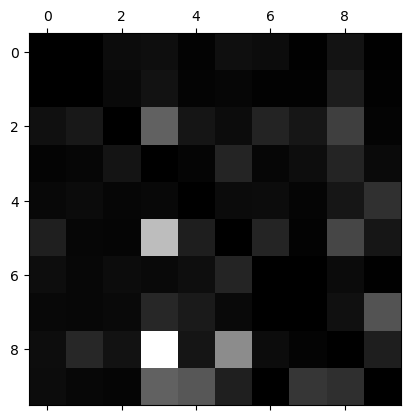

In [26]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)

conf_max = confusion_matrix(y_train, y_train_pred)

row_sums = conf_max.sum(axis=1, keepdims=True)
norm_conf_max = conf_max / row_sums

np.fill_diagonal(norm_conf_max, 0)

plt.matshow(norm_conf_max, cmap=plt.cm.gray)

plt.show()

#Linhas representam as classes reais e as colunas as classes previstas, e quando mais claro o bloco mais erros a classe obteve